<a href="https://colab.research.google.com/github/lsmanoel/lpae.github.io/blob/master/projetos/RoboticArm/Simulation/fundamentals/roboticArm_fundamentalsOfSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from random import gauss


class SolidPart:
    def __init__(self,
                 surface,
                 surface_size,
                 surface_resistance,
                 part_id,
                 category='neutral',
                 color=None,
                 pixel_meter_ratio=None,
                 sample_rate=30,
                 noise_std_deviation=1,
                 main_state='start_state'):

        self.surface = surface
        self.surface_size = surface_size
        self.surface_resistance = surface_resistance
        self.part_id = part_id

        self.category = category

        if color is None:
            self.color = [255]*3
        else:
            self.color = color

        self.pixel_meter_ratio = pixel_meter_ratio
        self.sample_rate = sample_rate
        self.sample_period = 1/sample_rate

        self.noise_std_deviation = noise_std_deviation

        self.main_state = main_state

    def update_pos(self):
        pass

    def check_collision_events(self, actor_list):
        pass

    def machine_state(self):
        pass

    def inherent_natural_action_forces(self):
        pass

    def update_key_action(self):
        pass

    def update_ai_action(self):
        pass

    def collision(self, actor):
        pass

    def animation(self):
        pass

    @property
    def noise(self):
        return gauss(mu=0, sigma=self.noise_std_deviation)

    @property
    def sample_rate(self):
        return int(self._sample_rate)

    @sample_rate.setter
    def sample_rate(self, value):
        self._sample_rate = int(value)
        self.sample_period = 1/value

    @property
    def sample_period(self):
        return self._sample_period

    @sample_period.setter
    def sample_period(self, value):
        self._sample_period = value
        self._sample_rate = 1/value

![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e4/Spherical-coordinates.png)

$$x=r\cos(\theta)\sin(\varphi) + ref(x)$$
$$y=r\sin(\theta)\sin(\varphi)+ ref(y)$$
$$z=r\cos(\varphi) + ref(z)$$



In [0]:
import numpy as np


class MasterPart(SolidPart):
    def __init__(self,
                 surface,
                 surface_size,
                 surface_resistance,
                 part_id,
                 category='leaver',
                 color=None,
                 pixel_meter_ratio=300,
                 sample_rate=30,
                 noise_std_deviation=1,
                 main_state='start_state',
                 init_teta = 0,
                 init_phi = 0,
                 init_R = 300,
                 init_ref=None,
                 init_force=None,
                 init_vel=None):

        super().__init__(surface,
                         surface_size,
                         surface_resistance,
                         part_id,
                         category=category,
                         color=color,
                         pixel_meter_ratio=pixel_meter_ratio,
                         sample_rate=sample_rate,
                         noise_std_deviation=noise_std_deviation,
                         main_state=main_state)

        self.dimension = 3

        self.R = init_R
        self._phi = init_phi
        self.r = self.R*np.sin(self._phi)    
        self._teta = init_teta
               

        if init_ref is None:
            self._ref = [surface_size[0]//2, surface_size[0]//2, surface_size[1]//2]
        else:
            self._ref = init_ref

        self.r = init_R*np.sin(init_phi)
        self.x = self.r*np.cos(init_teta) + self._ref[0]
        self.y = self.r*np.sin(init_teta) + self._ref[1]
        self.z = init_R*np.cos(init_phi) + self._ref[2]
        
    @property
    def ref(self):
        return self._ref

    @ref.setter
    def ref(self, value):
        self._ref = [int(i) for i in value]        
        self.x = self.r*np.cos(self._teta) + value[0]
        self.y = self.r*np.sin(self._teta) + value[1]
        self.z = self.R*np.cos(self._phi) + value[2]
      
    @property
    def teta(self):
        return self._teta
      
    @teta.setter
    def teta(self, value):
        self._teta = value
        self.x = int(self.r*np.cos(value) + self._ref[0])
        self.y = int(self.r*np.sin(value) + self._ref[1])
        self.z = int(self.R*np.cos(self._phi) + self._ref[2])
        
    @property
    def phi(self):
        return self._phi
      
    @phi.setter
    def phi(self, value):
        self._phi = value
        self.r = self._R*np.sin(value)
        self.x  = int(self.r*np.cos(self._teta) + self._ref[0])
        self.y  = int(self.r*np.sin(self._teta) + self._ref[1])
        self.z  = int(self.R*np.cos(value) + self._ref[2])       

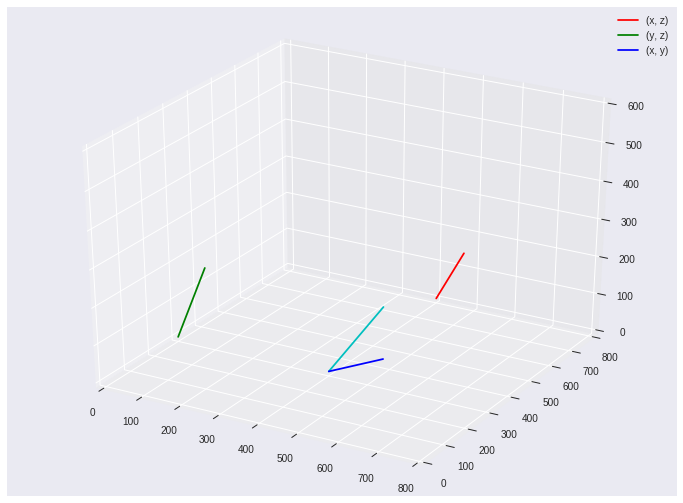

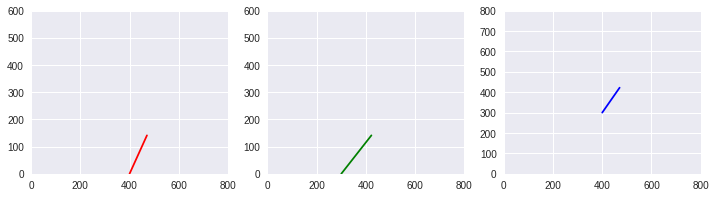

In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

lever_1 = MasterPart(None,
                     [800, 600],
                     None,
                     'master',
                     init_ref = [400, 300, 0],
                     init_teta = np.pi/3,
                     init_phi = np.pi/4,
                     init_R= 200)

#===============================================================================
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
x = np.linspace(lever_1.ref[0], lever_1.x, 100)
y = np.linspace(lever_1.ref[1], lever_1.y, 100)
z = np.linspace(lever_1.ref[2], lever_1.z, 100)
ax.plot(x, y, z, color='c',)
ax.plot(x, z, color='r', zdir='y', zs=lever_1.surface_size[0], label='(x, z)')
ax.plot(y, z, color='g', zdir='x', zs=0, label='(y, z)')
ax.plot(x, y, color='b', zdir='z', zs=0, label='(x, y)')
ax.set_aspect('auto')
ax.set_xlim([0, lever_1.surface_size[0]])
ax.set_ylim([0, lever_1.surface_size[0]])
ax.set_zlim([0, lever_1.surface_size[1]])
ax.legend()
plt.show()
#===============================================================================  
fig = plt.figure(figsize=(12,3))
#------------------------------------------------------------------------------- 
ax1 = fig.add_subplot(1, 3, 1)
x = np.linspace(lever_1.ref[0], lever_1.x, 100)
z = np.linspace(lever_1.ref[2], lever_1.z, 100)
ax1.plot(x, z, color='r')
ax1.set_xlim([0, lever_1.surface_size[0]])
ax1.set_ylim([0, lever_1.surface_size[1]])
#-------------------------------------------------------------------------------  
ax2 = fig.add_subplot(1, 3, 2)
y = np.linspace(lever_1.ref[1], lever_1.y, 100)
z = np.linspace(lever_1.ref[2], lever_1.z, 100)
ax2.plot(y, z, color='g')
ax2.set_xlim([0, lever_1.surface_size[0]])
ax2.set_ylim([0, lever_1.surface_size[1]])
#-------------------------------------------------------------------------------  
ax3 = fig.add_subplot(1, 3, 3)
x = np.linspace(lever_1.ref[0], lever_1.x, 100)
y = np.linspace(lever_1.ref[1], lever_1.y, 100)
ax3.plot(x, y, color='b')
ax3.set_xlim([0, lever_1.surface_size[0]])
ax3.set_ylim([0, lever_1.surface_size[0]])
#-------------------------------------------------------------------------------  
plt.show()
#===============================================================================

![alt text](https://raw.githubusercontent.com/lsmanoel/lpae.github.io/master/projetos/RoboticArm/arm_1.png)

In [0]:
import numpy as np


class SlavePart(SolidPart):
    def __init__(self,
                 master_part,
                 surface,
                 surface_size,
                 surface_resistance,
                 part_id,
                 category='slave',
                 color=None,
                 pixel_meter_ratio=300,
                 sample_rate=30,
                 noise_std_deviation=1,
                 main_state='start_state',
                 init_phi = 0,
                 init_R = 300,
                 init_force=None,
                 init_vel=None):

        super().__init__(surface,
                         surface_size,
                         surface_resistance,
                         part_id,
                         category=category,
                         color=color,
                         pixel_meter_ratio=pixel_meter_ratio,
                         sample_rate=sample_rate,
                         noise_std_deviation=noise_std_deviation,
                         main_state=main_state)

        self.dimension = 3
        
        self.master = master_part
        
        self._phi = init_phi        
        self.R = init_R       
        self.r = self.R*np.sin(self._phi)
        self._teta = self.master.teta
        self._ref = [self.master .x, self.master.y, self.master.z]
        
        self.x = self.r*np.cos(self._teta) + self._ref[0]
        self.y = self.r*np.sin(self._teta) + self._ref[1]
        self.z = self.R*np.cos(self._phi)  + self._ref[2]

    @property
    def ref(self):
        return self._ref

    @ref.setter
    def ref(self, value):
        self._ref = [int(i) for i in value]        
        self.x = self.r*np.cos(self._teta) + value[0]
        self.y = self.r*np.sin(self._teta) + value[1]
        self.z = self.R*np.cos(self._phi) + value[2]
      
    @property
    def teta(self):
        return self._teta
      
    @teta.setter
    def teta(self, value):
        self._teta = value
        self.x = int(self.r*np.cos(value) + self._ref[0])
        self.y = int(self.r*np.sin(value) + self._ref[1])
        self.z = int(self.R*np.cos(self._phi) + self._ref[2])
        
    @property
    def phi(self):
        return self._phi
      
    @phi.setter
    def phi(self, value):
        self._phi = value
        self.r = self._R*np.sin(value)
        self.x  = int(self.r*np.cos(self._teta) + self._ref[0])
        self.y  = int(self.r*np.sin(self._teta) + self._ref[1])
        self.z  = int(self.R*np.cos(value) + self._ref[2])   

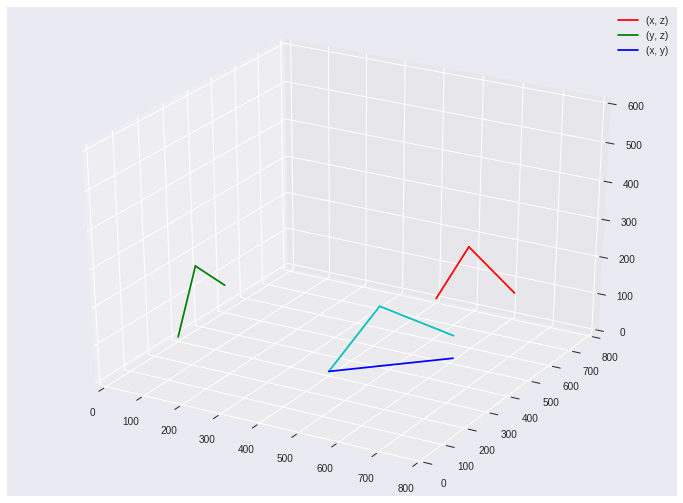

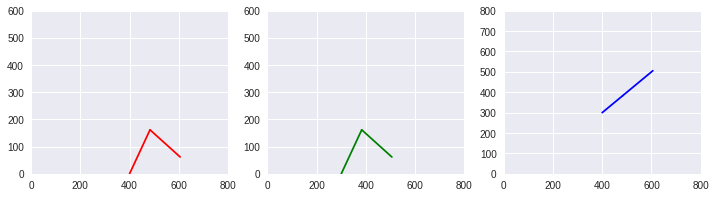

In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

lever_1 = MasterPart(None,
                     [800, 600],
                     None,
                     'master',
                     init_ref = [400, 300, 0],
                     init_teta = np.pi/4,
                     init_phi = np.pi/5,
                     init_R= 200)

lever_2 = SlavePart(lever_1,
                    None,
                    [800, 600],
                    None,
                    'slave',
                    init_phi = 2*np.pi/3,
                    init_R= 200)

#===============================================================================
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
x = np.linspace(lever_1.ref[0], lever_1.x, 100)
y = np.linspace(lever_1.ref[1], lever_1.y, 100)
z = np.linspace(lever_1.ref[2], lever_1.z, 100)
ax.plot(x, y, z, color='c',)
ax.plot(x, z, color='r', zdir='y', zs=lever_1.surface_size[0], label='(x, z)')
ax.plot(y, z, color='g', zdir='x', zs=0, label='(y, z)')
ax.plot(x, y, color='b', zdir='z', zs=0, label='(x, y)')
x = np.linspace(lever_2.ref[0], lever_2.x, 100)
y = np.linspace(lever_2.ref[1], lever_2.y, 100)
z = np.linspace(lever_2.ref[2], lever_2.z, 100)
ax.plot(x, y, z, color='c',)
ax.plot(x, z, color='r', zdir='y', zs=lever_1.surface_size[0])
ax.plot(y, z, color='g', zdir='x', zs=0)
ax.plot(x, y, color='b', zdir='z', zs=0)
ax.set_aspect('auto')
ax.set_xlim([0, lever_1.surface_size[0]])
ax.set_ylim([0, lever_1.surface_size[0]])
ax.set_zlim([0, lever_1.surface_size[1]])
ax.legend()
plt.show()
#===============================================================================  
fig = plt.figure(figsize=(12,3))
#------------------------------------------------------------------------------- 
ax1 = fig.add_subplot(1, 3, 1)
x = np.linspace(lever_1.ref[0], lever_1.x, 100)
z = np.linspace(lever_1.ref[2], lever_1.z, 100)
ax1.plot(x, z, color='r')
x = np.linspace(lever_2.ref[0], lever_2.x, 100)
z = np.linspace(lever_2.ref[2], lever_2.z, 100)
ax1.plot(x, z, color='r')
ax1.set_xlim([0, lever_1.surface_size[0]])
ax1.set_ylim([0, lever_1.surface_size[1]])
#-------------------------------------------------------------------------------  
ax2 = fig.add_subplot(1, 3, 2)
y = np.linspace(lever_1.ref[1], lever_1.y, 100)
z = np.linspace(lever_1.ref[2], lever_1.z, 100)
ax2.plot(y, z, color='g')
y = np.linspace(lever_2.ref[1], lever_2.y, 100)
z = np.linspace(lever_2.ref[2], lever_2.z, 100)
ax2.plot(y, z, color='g')
ax2.set_xlim([0, lever_1.surface_size[0]])
ax2.set_ylim([0, lever_1.surface_size[1]])
#-------------------------------------------------------------------------------  
ax3 = fig.add_subplot(1, 3, 3)
x = np.linspace(lever_1.ref[0], lever_1.x, 100)
y = np.linspace(lever_1.ref[1], lever_1.y, 100)
ax3.plot(x, y, color='b')
x = np.linspace(lever_2.ref[0], lever_2.x, 100)
y = np.linspace(lever_2.ref[1], lever_2.y, 100)
ax3.plot(x, y, color='b')
ax3.set_xlim([0, lever_1.surface_size[0]])
ax3.set_ylim([0, lever_1.surface_size[0]])
#-------------------------------------------------------------------------------  
plt.show()
#===============================================================================